# Iris Classification



In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

read the data file and covert it to dataframe and then use it as dataframe(df)

In [74]:
df = pd.read_csv("iris.data",names=["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","class"])

In [75]:
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Describe all df which show all data types of all columns


In [76]:
df.describe

<bound method NDFrame.describe of      sepal length in cm  sepal width in cm  petal length in cm  \
0                   5.1                3.5                 1.4   
1                   4.9                3.0                 1.4   
2                   4.7                3.2                 1.3   
3                   4.6                3.1                 1.5   
4                   5.0                3.6                 1.4   
..                  ...                ...                 ...   
145                 6.7                3.0                 5.2   
146                 6.3                2.5                 5.0   
147                 6.5                3.0                 5.2   
148                 6.2                3.4                 5.4   
149                 5.9                3.0                 5.1   

     petal width in cm           class  
0                  0.2     Iris-setosa  
1                  0.2     Iris-setosa  
2                  0.2     Iris-setosa  
3        

see no of columns and rows

In [77]:
df.shape

(150, 5)

Show Name of columns and its types

In [78]:
df.dtypes

sepal length in cm    float64
sepal width in cm     float64
petal length in cm    float64
petal width in cm     float64
class                  object
dtype: object

Check the is any null values are present or not

In [79]:
df.isnull()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [80]:
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

Display info about variables and columns

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Describe the perticular columns

In [82]:
print(df["class"].describe())

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object


Checking count of unique values

In [83]:
print(df["class"].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


As values are uniformly distributed so no further checking needed

Check is there any outliers are present or not
for this print #boxPlot 

sepal length in cm       AxesSubplot(0.125,0.786098;0.352273x0.0939024)
sepal width in cm     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
petal length in cm       AxesSubplot(0.125,0.673415;0.352273x0.0939024)
petal width in cm     AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dtype: object

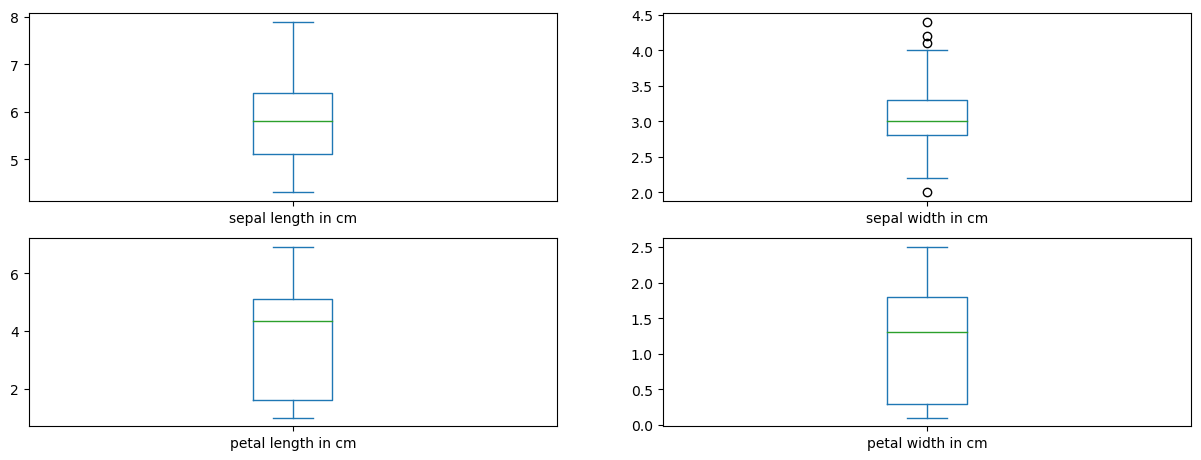

In [84]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

Remove the outliers Using the InterQuartile Range to fill the values

In [96]:
def remove_outlier(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    return np.clip(col, lower_whisker, upper_whisker)

def treat_outliers_all(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col] = remove_outlier(df[col])
    return df

df = treat_outliers_all(df)

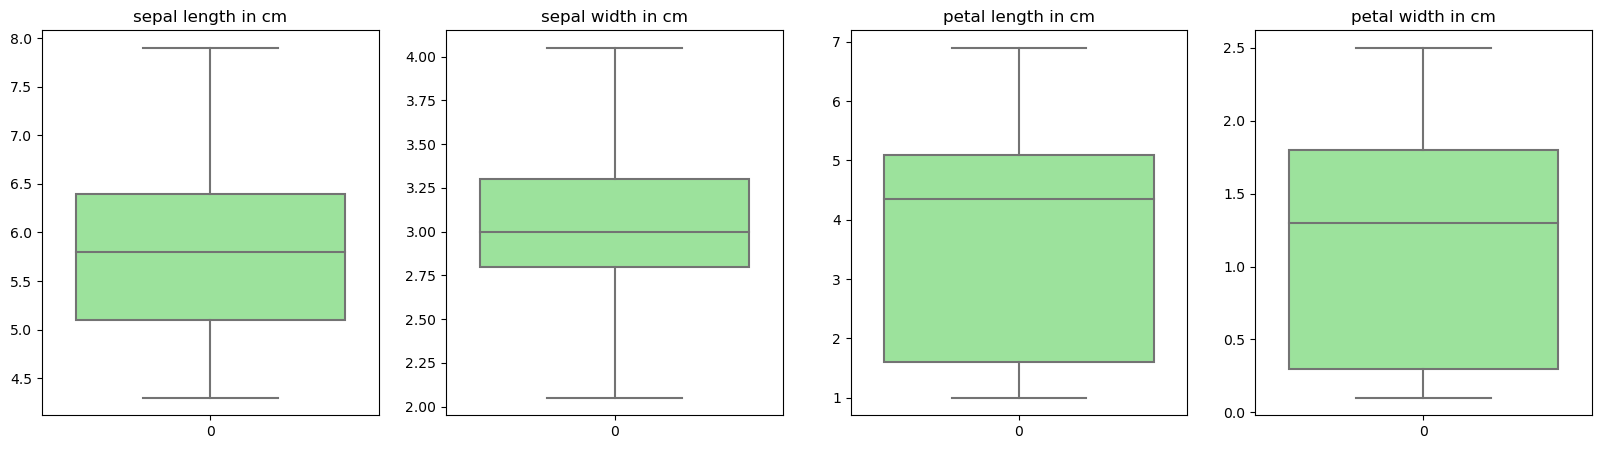

In [97]:
plt.subplots(figsize=(20,5)) 
for i,a in enumerate(df.drop(columns="class").columns):
    plt.subplot(1,4,i+1)
    sns.boxplot(data=df[a],color="lightgreen")
    plt.title(a)
plt.show()

We can observed that there is no Outliers are present

sepal length in cm       AxesSubplot(0.125,0.786098;0.352273x0.0939024)
sepal width in cm     AxesSubplot(0.547727,0.786098;0.352273x0.0939024)
petal length in cm       AxesSubplot(0.125,0.673415;0.352273x0.0939024)
petal width in cm     AxesSubplot(0.547727,0.673415;0.352273x0.0939024)
dtype: object

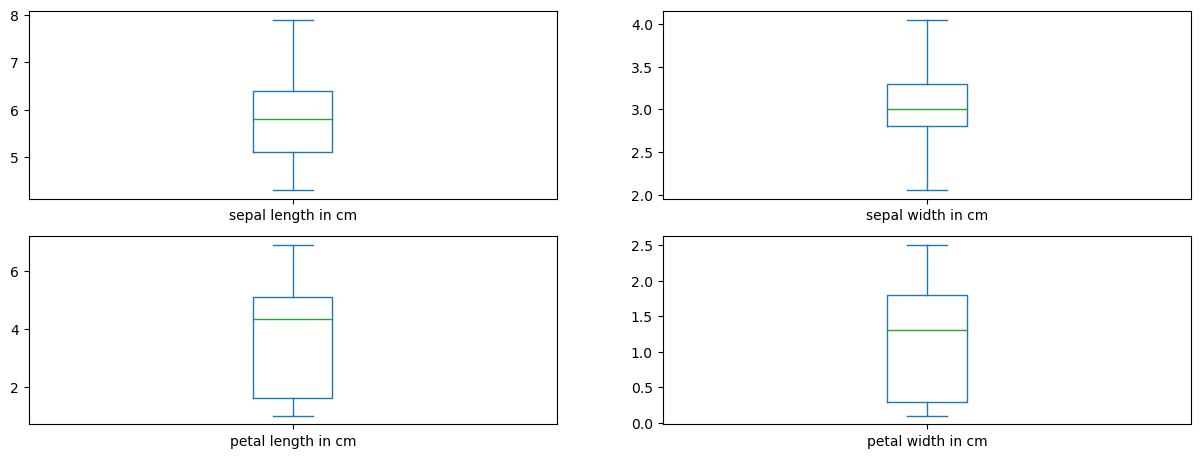

In [98]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

We can see here outliers are successfully removed from sepal width in cm

sepal width in cm    AxesSubplot(0.125,0.786098;0.352273x0.0939024)
dtype: object

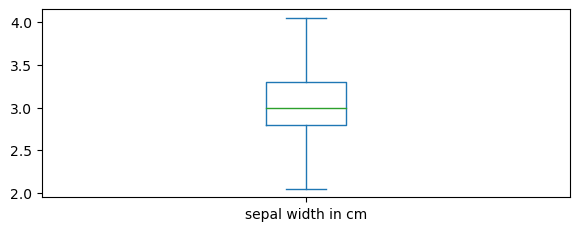

In [99]:
df['sepal width in cm'].plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

Check Relationship between target and indipendent variables

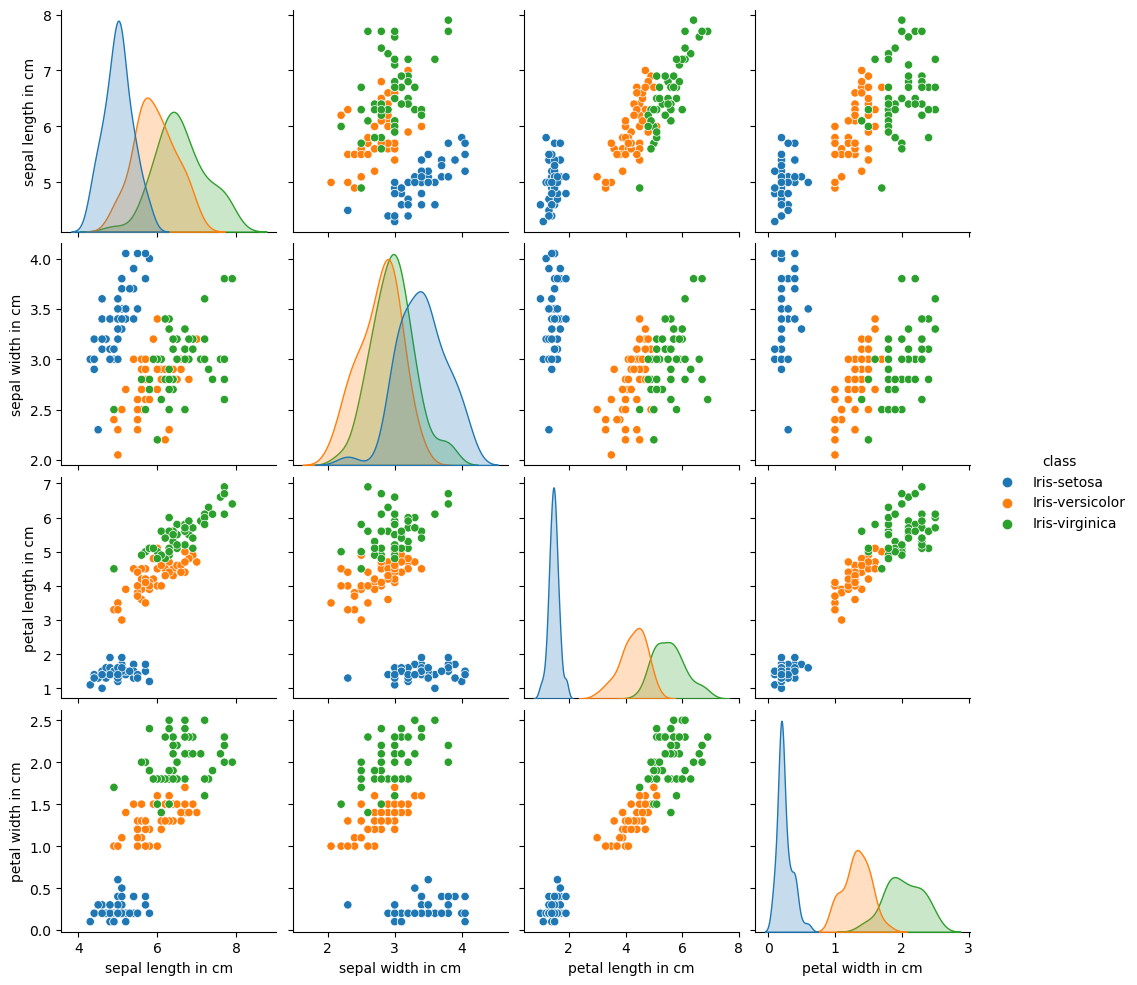

In [101]:
x = df.drop(columns="class")
y = df["class"]
sns.pairplot(data=df,hue="class")
plt.show()

# spliting data into Test and Train

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


Feacture extraction by applying standard scaler

In [103]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Creating logistic Regression model

In [104]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

LogisticRegression(random_state=0)

Show and print the predicted testset 

In [105]:
y_pred = lr.predict(x_test)

In [106]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [107]:
y_train

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: class, Length: 120, dtype: object

Show the confussion matrix

In [110]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
matrix= confusion_matrix(y_test, y_pred)
print(matrix)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Print Accuracy score

In [111]:
print(accuracy_score(y_test,y_pred))

1.0


Show classification report

In [112]:
cr= classification_report(y_test, y_pred)
print(cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Visual heat map of confussion matrix

<AxesSubplot:>

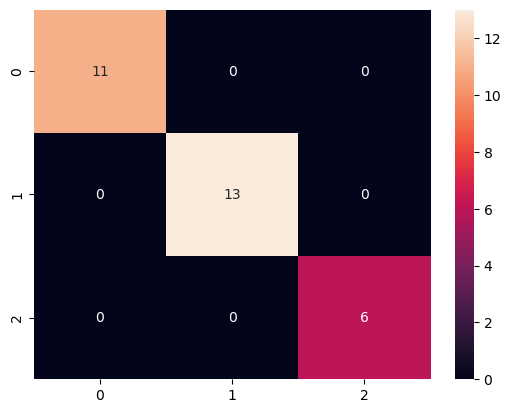

In [113]:
import seaborn as sns 
sns.heatmap(matrix, annot=True)

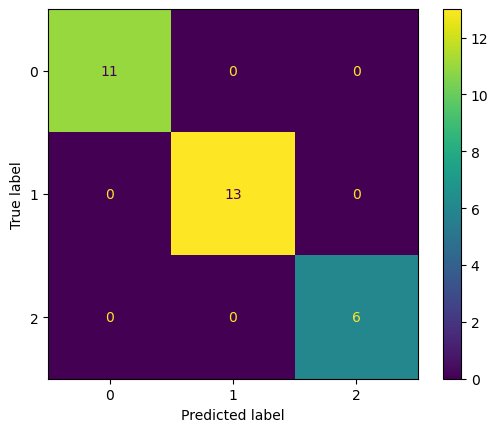

In [114]:
conf_dis = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred))
conf_dis.plot(cmap="viridis")
plt.show()